## Kaggle Titanic Competition

This is a solution to the intro competition on kaggle.com, Still figuring out the programming aspect to ML, so comments in code are mostly my attempts at absorbing concepts.

---



In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Github data links
gender_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/gender_submission.csv'
train_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/test.csv'

gender_df = pd.read_csv(gender_url)
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

Showing sample data.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Analysis

In [5]:
# Finding amount of female survivors

women = train_df.loc[train_df.Sex == 'female']['Survived']
w_survival = sum(women) / len(women)

print(f'Female survival rate: {round(w_survival * 100, 3)}%')

Female survival rate: 74.204%


In [6]:
# Finding amount of male survivors

men = train_df.loc[train_df.Sex == 'male']['Survived']
m_survival = sum(men) / len(men)

print(f'Male survival rate: {round(m_survival * 100, 3)}%')

Male survival rate: 18.891%


In [7]:
# Testing data Using random forest Classification
y = train_df['Survived']

# Features for decision nodes in the model.
features = ['Pclass', 'Sex', 'SibSp'] 

# pd.get_dummies() categorizes the features into numerical values.
# Important for columns like 'Sex', Male/Female == 0/1.
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

# n_estimators = num of decision trees | max_depth = depth of trees.
# random_state ??? Might control which features to be used in the decision nodes.
# Might also control which part of the dataset is used in the process? Unsure.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# model.predict() produces an output using the fitted model and test data.
predictions = model.predict(X_test)
# Creates output csv using a new dataframe with our predictions.
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


# Visualizing Predictions.

Setting up our visualization libraries.

In [8]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

predict_df = pd.read_csv('/content/submission.csv')


print("Setup Complete")
predict_df.head()

Setup Complete


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [12]:
full_predict = predict_df.set_index('PassengerId').join(test_df.set_index('PassengerId'))
full_predict.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Taking a look at Passenger survival rates by Ticket Class. 

---

Deaths within our prediction data seem to trend higher as we move down the class structure, though this could be partly attributed to the amount of passengers in each class.

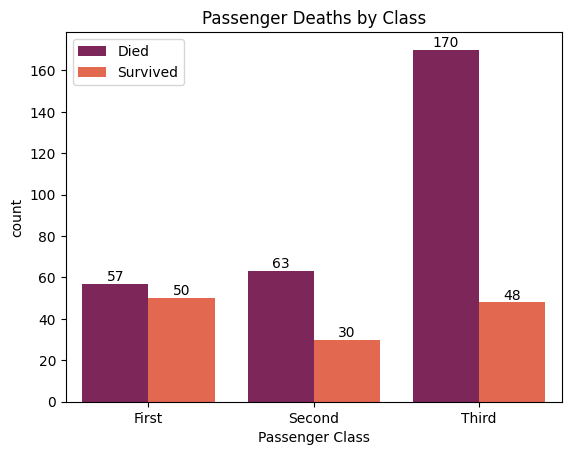

In [31]:
class_survival = sns.countplot(data=full_predict, 
                               x='Pclass', 
                               hue='Survived', 
                               palette='rocket', 
                               saturation=.85)

class_survival.set(title='Passenger Deaths by Class',
                   xticklabels=['First', 'Second', 'Third'],
                   xlabel='Passenger Class')

class_survival.legend(labels = ['Died', 'Survived'])

for container in class_survival.containers:
  class_survival.bar_label(container)